<a href="https://colab.research.google.com/github/Bastinjob/helloworld/blob/master/Linear_Regression_(Unsupervised_Machine_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME : BASTIN BAJIYO JOB

EMAIL : bastinjob1998@gmail.com

## PREDICTION USING UNSUPERVISED MACHINE LEARNING

### Introduction

In this programming task, we are going to predict the grades of a student with respect to the number of hours studied, using Unsupervised Machine Learning technique.

This is a simple **Linear Regression** problem, since it invloves only two variables.


Programming Language : **Python**


Machine-Learning Library : **SciKit-Learn**

In [7]:
# Importing the necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
# Acquiring the Data

data_url = 'http://bit.ly/w-data'

data = pd.read_csv(data_url)
print('Data Acquisition Successful')

#Viewing the Data 
data.head()

Data Acquisition Successful


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Preliminary Data Analysis :
We now visuaize the data and try to acquire some insight on the reltionship betlween the variables, manually.

Text(0, 0.5, 'Score')

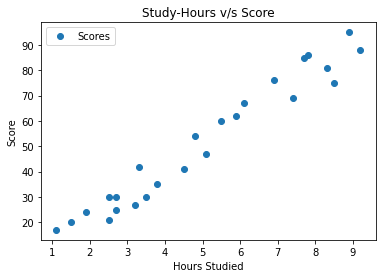

In [11]:
data.plot(x = 'Hours',y = 'Scores',style = 'o')
plt.title('Study-Hours v/s Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score')

As we can see, the relationship between the two variables is roughly **linear**.

### Data Pre-Processing

Here we have two tasks :

(i)Arranging the Dataset into Input(attributes) and Output(label) 

(ii)Splitting the arranged data into training and testing sets

In [24]:
#Arranging the Data into attributes and labels

X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values


In [25]:
#Train-Test Split

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 0)

### Training the Model

In [26]:
#Import and Initialise the necessary Model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#Train in the Model with the dataset

regressor.fit(X_train,Y_train)

print('Training Successful')

Training Successful


### Testing the Model

Now that we have trained the Linear Regression Model, it is time to test it using the Test set.

In [27]:
#Making Predictions
prediction = regressor.predict(X_test)

comparison = pd.DataFrame({'Actual' :Y_test, 'Predicted':prediction })
comparison.head()

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106


### Evaluating the Model

We use **Mean Absolute Error** as the evaluation Metric. Mean absolute error is average vale of the absolute error between to data points.

In [28]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(Y_test,prediction)
print("Mean Absolute Error : {}".format(MAE))

Mean Absolute Error : 4.130879918502482


### Fitting the Regression Line 


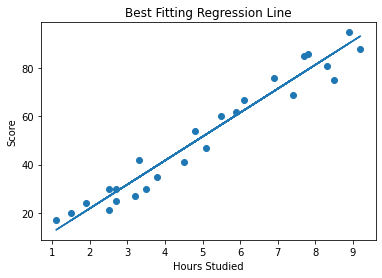

In [39]:
# Equation of the line is of the form y = m*x+ b
slope = regressor.coef_
intercept = regressor.intercept_

line = slope*X + intercept

plt.scatter(X,Y)
plt.plot(X,line)
plt.title('Best Fitting Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

### Testing with a new Sample Data

Finally we test out the moel with a new input of our own. Here we look for a predicted score that astuednt will get, if he studies for **9.25** Hours

In [38]:
score = regressor.predict([[9.25]])

print('Predicted Score for a Study time of 9.25 Hours : {}'.format(score[0]))

Predicted Score for a Study time of 9.25 Hours : 93.89272889341652
